In [18]:
import numpy as np
import psycopg2 as psy
import pandas as pd
import matplotlib.pyplot as plot
conn = psy.connect(dbname="dmitry", user="dmitry") 
print ('ВЫБЕРИТЕ ЭМИТЕНТ ИЗ СПИСКА:')
data = pd.read_sql_query ("select distinct instrs.EmitentName from base1, instrs where base1.id=instrs.id ;",conn )
data

ВЫБЕРИТЕ ЭМИТЕНТ ИЗ СПИСКА:


,emitentname
0,РЕГИОН-ИНВЕСТ ООО
1,ТГК-1
2,Обувьрус
3,Банк ВТБ
4,ИКС 5 ФИНАНС
5,Новатэк
6,Полипласт
7,УНИВЕР Капитал
8,Петрокоммерц КБ
9,Магнит


ВВЕДИТЕ ИМЯ ЭМИТЕНТА В ТОЧНОЧТИ В ОДИНАРНЫХ КАВЫЧКАХ И НАЖМИТЕ ENTER:
'РЖД'


,emitentname,isin,issuesize,mat_date
0,РЖД,RU000A0JQ4F1,15000000.0,2014-03-06
1,РЖД,RU000A0JQ4U0,15000000.0,2015-04-07
2,РЖД,RU000A0JQ177,15000000.0,2015-11-18
3,РЖД,RU000A0JQ6S9,15000000.0,2016-06-20
4,РЖД,RU000A0JQ656,15000000.0,2017-06-05
5,РЖД,RU000A0JQ7W9,15000000.0,2018-07-16
6,РЖД,RU000A0JQ5Q5,15000000.0,2019-05-16
7,РЖД,RU000A0JQ7X7,15000000.0,2019-07-15
8,РЖД,RU000A0JQ7Z2,10000000.0,2024-07-08
9,РЖД,RU000A0JQRD9,15000000.0,2025-01-16


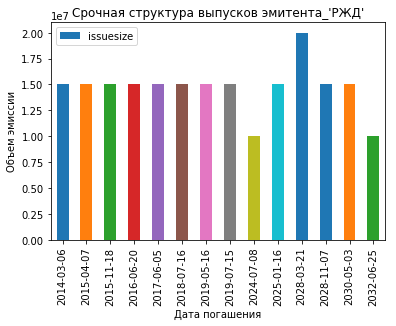

In [24]:
query1 = "select distinct instrs.EmitentName, base1.isin,  base1.issuesize, base1.mat_date from base1, instrs where base1.id=instrs.id and instrs.EmitentName =\n"
query2 = "\norder by mat_date asc;"
print ('ВВЕДИТЕ ИМЯ ЭМИТЕНТА В ТОЧНОЧТИ В ОДИНАРНЫХ КАВЫЧКАХ И НАЖМИТЕ ENTER:')
name = input()
data = pd.read_sql_query (query1+name+query2,conn)
data.plot.bar(y='issuesize', x='mat_date')
plot.xlabel('Дата погашения')
plot.ylabel('Объем эмиссии') 
plot.title('Срочная структура выпусков эмитента_'+name)
plot.savefig('Срочная_структура.pdf')
data



ВСТАВЬТЕ ЛЮБОЙ ISIN ВЫПУСКА ИЗ ПРЕДЫДУЩЕЙ ТАБЛИЦЫ (в одинарных кавычках) И НАЖМИТЕ ENTER:
'RU000A0JTU85'


,isin,cpn,cpn_date
0,RU000A0JTU85,40.8900,2014-04-08
1,RU000A0JTU85,40.8900,2014-10-07
2,RU000A0JTU85,40.8900,2015-04-07
3,RU000A0JTU85,40.8877,2015-10-06
4,RU000A0JTU85,40.8900,2015-10-06
5,RU000A0JTU85,40.8877,2016-04-05


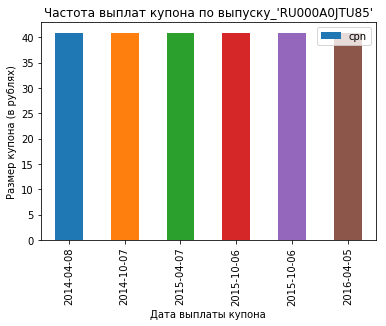

In [25]:
query1 = "select distinct base1.isin,  base1.cpn, base1.cpn_date from base1, instrs where base1.id=instrs.id and base1.isin =\n"
query2 = "\norder by cpn_date asc;"
print ('ВСТАВЬТЕ ЛЮБОЙ ISIN ВЫПУСКА ИЗ ПРЕДЫДУЩЕЙ ТАБЛИЦЫ (в одинарных кавычках) И НАЖМИТЕ ENTER:')
name = input()
data = pd.read_sql_query (query1+name+query2,conn)
data.plot.bar(y='cpn', x='cpn_date')
plot.xlabel('Дата выплаты купона')
plot.ylabel('Размер купона (в рублях)') 
plot.title('Частота выплат купона по выпуску_'+name)
data

In [27]:
query1 = "select distinct base1.isin,  base1.cpn, base1.cpn_date from base1, instrs where base1.id=instrs.id and base1.isin =\n"
query2 = "\norder by cpn_date asc;"
data = pd.read_sql_query (query1+name+query2,conn)
rate = pd.read_sql_query ("select один_год from cbr ;",conn)
disc_rate = rate.один_год[0]/100
i = 0
a = 0
while i < data.cpn.size:
    a = a + data.cpn[i]/(1+disc_rate)**(i+1)
    i+=1
print ('ДИСКОНТИРОВАННАЯ СТОИМОСТЬ ПОТОКА КУПОННЫХ ПЛАТЕЖЕЙ:'' '+str(a))

ДИСКОНТИРОВАННАЯ СТОИМОСТЬ ПОТОКА КУПОННЫХ ПЛАТЕЖЕЙ: 176.27194726235484


ДИСКОНТИРОВАННАЯ СТОИМОСТЬ ПОТОКА КУПОННЫХ ПЛАТЕЖЕЙ: 176.27194726235484


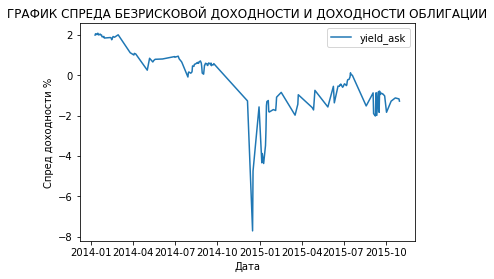

In [29]:
query1 = "select base1.time, cbr.дата, base1.isin, base1.yield_ask, cbr.один_год from base1, cbr where base1.time = cbr.дата and base1.isin =\n"
query2 = "\n;"
conn = psy.connect(dbname="dmitry", user="dmitry")
data = pd.read_sql_query (query1+name+query2,conn)
spread = data.yield_ask-data.один_год
data.yield_ask = spread
data.plot(y='yield_ask', x='дата')
plot.xlabel('Дата')
plot.ylabel('Спред доходности %') 
plot.title('ГРАФИК СПРЕДА БЕЗРИСКОВОЙ ДОХОДНОСТИ И ДОХОДНОСТИ ОБЛИГАЦИИ')
print ('ДИСКОНТИРОВАННАЯ СТОИМОСТЬ ПОТОКА КУПОННЫХ ПЛАТЕЖЕЙ:'' '+str(a))
plot.savefig('спред_безрисковой_доходности.pdf')